<a href="https://colab.research.google.com/github/amanm063/JUPYTER-NOTEBOOK-DATA-SCIENCE-BEGINNING/blob/master/cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

here is the link to the dataset
https://www.kaggle.com/shabbrikhan0015/cancer-classification/data

In [ ]:
df=pd.read_csv("cancer_classification.csv")

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

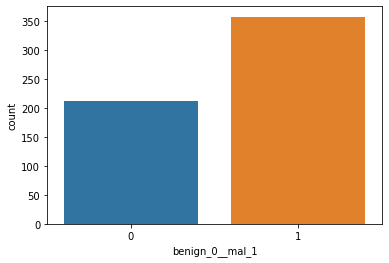

In [ ]:
sns.countplot(x="benign_0__mal_1",data=df)

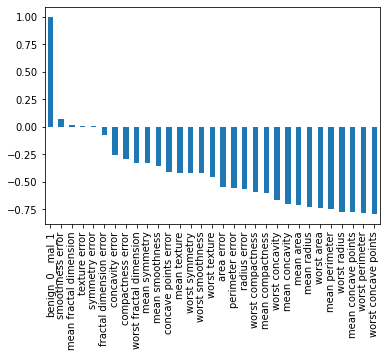

In [ ]:
df.corr()["benign_0__mal_1"].sort_values(ascending=False).plot(kind="bar")

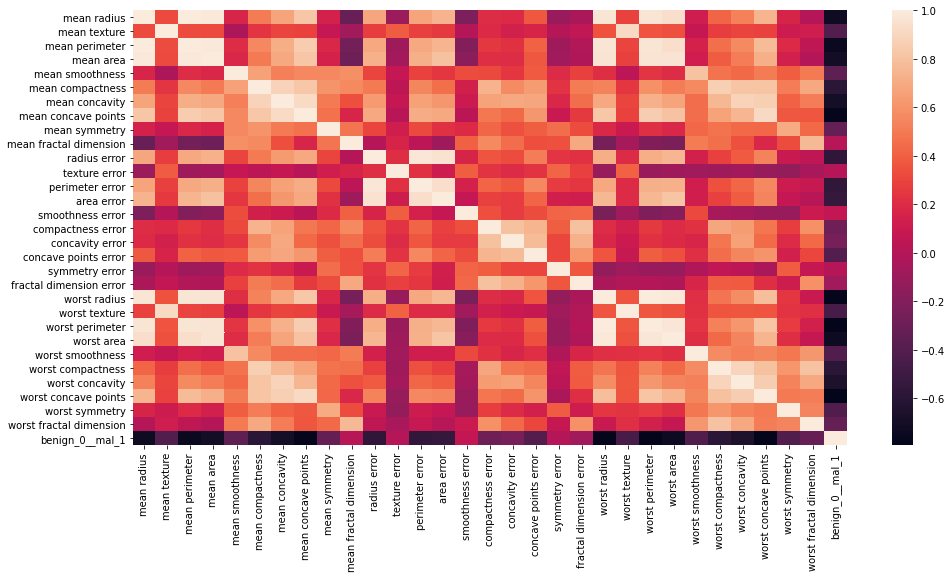

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr())

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop("benign_0__mal_1",axis=1).values
y = df["benign_0__mal_1"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.fit_transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
X_train.shape

(381, 30)

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(30, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")

In [ ]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
12/12 [==============================] - 1s 14ms/step - loss: 0.6981 - val_loss: 0.6855
Epoch 2/600
12/12 [==============================] - 0s 5ms/step - loss: 0.6773 - val_loss: 0.6658
Epoch 3/600
12/12 [==============================] - 0s 4ms/step - loss: 0.6585 - val_loss: 0.6444
Epoch 4/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6376 - val_loss: 0.6164
Epoch 5/600
12/12 [==============================] - 0s 4ms/step - loss: 0.6122 - val_loss: 0.5838
Epoch 6/600
12/12 [==============================] - 0s 5ms/step - loss: 0.5828 - val_loss: 0.5485
Epoch 7/600
12/12 [==============================] - 0s 5ms/step - loss: 0.5494 - val_loss: 0.5112
Epoch 8/600
12/12 [==============================] - 0s 3ms/step - loss: 0.5106 - val_loss: 0.4676
Epoch 9/600
12/12 [==============================] - 0s 3ms/step - loss: 0.4705 - val_loss: 0.4244
Epoch 10/600
12/12 [==============================] - 0s 4ms/step - loss: 0.4302 - val_loss: 0.3834
Epoch 11

In [ ]:
loss = pd.DataFrame(model.history.history)

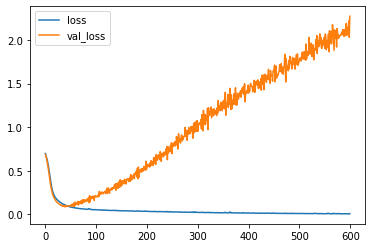

In [ ]:
loss.plot()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model2 = Sequential()
model2.add(Dense(30, activation="relu"))
model2.add(Dense(15, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))

model2.compile(loss="binary_crossentropy",optimizer="adam")

In [ ]:
early = EarlyStopping(monitor="val_loss",mode="min",verbose=2,patience=25) 

In [ ]:
model2.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early])

Epoch 1/600
12/12 [==============================] - 0s 12ms/step - loss: 0.6749 - val_loss: 0.6519
Epoch 2/600
12/12 [==============================] - 0s 5ms/step - loss: 0.6443 - val_loss: 0.6188
Epoch 3/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6084 - val_loss: 0.5849
Epoch 4/600
12/12 [==============================] - 0s 4ms/step - loss: 0.5686 - val_loss: 0.5403
Epoch 5/600
12/12 [==============================] - 0s 3ms/step - loss: 0.5193 - val_loss: 0.4867
Epoch 6/600
12/12 [==============================] - 0s 4ms/step - loss: 0.4661 - val_loss: 0.4333
Epoch 7/600
12/12 [==============================] - 0s 4ms/step - loss: 0.4137 - val_loss: 0.3861
Epoch 8/600
12/12 [==============================] - 0s 3ms/step - loss: 0.3616 - val_loss: 0.3352
Epoch 9/600
12/12 [==============================] - 0s 4ms/step - loss: 0.3213 - val_loss: 0.2979
Epoch 10/600
12/12 [==============================] - 0s 4ms/step - loss: 0.2870 - val_loss: 0.2797
Epoch 11

In [ ]:
loss2 = pd.DataFrame(model2.history.history)

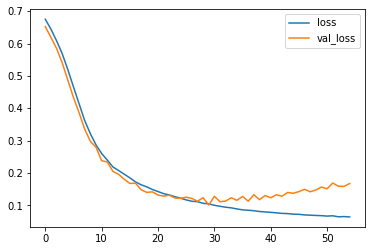

In [ ]:
loss2.plot()

In [ ]:
model3 = Sequential()
model3.add(Dense(30, activation="relu"))
model3.add(Dropout(0.5))
model3.add(Dense(15, activation="relu"))
model3.add(Dropout(0.5))
model3.add(Dense(1, activation="sigmoid"))

model3.compile(loss="binary_crossentropy",optimizer="adam")

In [ ]:
model3.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early])

Epoch 1/600
12/12 [==============================] - 1s 11ms/step - loss: 0.6800 - val_loss: 0.6630
Epoch 2/600
12/12 [==============================] - 0s 4ms/step - loss: 0.6699 - val_loss: 0.6517
Epoch 3/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6679 - val_loss: 0.6408
Epoch 4/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6490 - val_loss: 0.6240
Epoch 5/600
12/12 [==============================] - 0s 5ms/step - loss: 0.6380 - val_loss: 0.6053
Epoch 6/600
12/12 [==============================] - 0s 5ms/step - loss: 0.6207 - val_loss: 0.5819
Epoch 7/600
12/12 [==============================] - 0s 5ms/step - loss: 0.5972 - val_loss: 0.5550
Epoch 8/600
12/12 [==============================] - 0s 4ms/step - loss: 0.5715 - val_loss: 0.5288
Epoch 9/600
12/12 [==============================] - 0s 4ms/step - loss: 0.5564 - val_loss: 0.5040
Epoch 10/600
12/12 [==============================] - 0s 5ms/step - loss: 0.5330 - val_loss: 0.4760
Epoch 11

In [ ]:
loss3 = pd.DataFrame(model3.history.history)

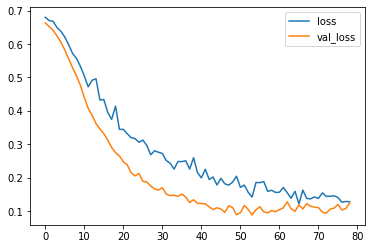

In [ ]:
loss3.plot()

In [ ]:
predictions = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        67
           1       0.99      0.94      0.97       121

    accuracy                           0.96       188
   macro avg       0.95      0.96      0.95       188
weighted avg       0.96      0.96      0.96       188



In [ ]:
print(confusion_matrix(y_test,predictions))

[[ 66   1]
 [  7 114]]
